In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# 一元线性回归

In [7]:
path = 'ex1data1.txt'
data = pd.read_csv(path,header=None,names = ['Population','Profit'])
print(data.shape)
data.head()

(97, 2)


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [8]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


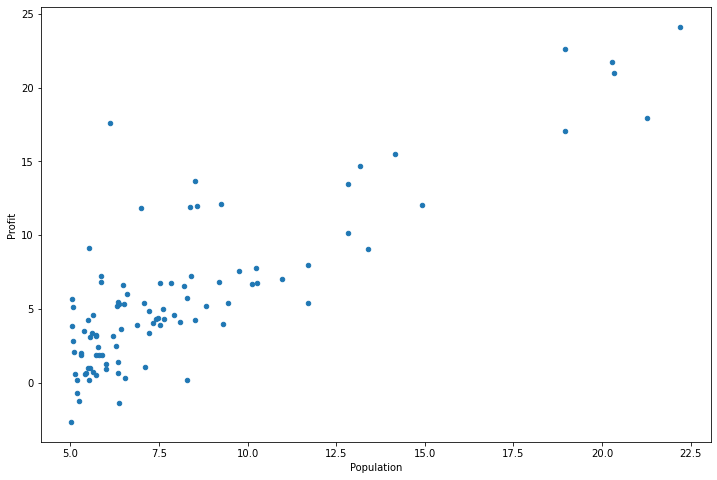

In [9]:
data.plot(kind='scatter',x='Population',y='Profit',figsize=(12,8))
plt.show()

In [10]:
# cost function
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [11]:
# add x_0 column for equation 
data.insert(0,'Ones',1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [12]:
# set X and y
cols = data.shape[1]
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]
print(X.head())
print(y.head())

   Ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598
0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64


In [13]:
X = np.matrix(X.values)
y = np.matrix(y.values).T
theta = np.matrix(np.array([0,0]))
X.shape,y.shape,theta.shape

((97, 2), (97, 1), (1, 2))

In [14]:
# compute the initial cost value
computeCost(X,y,theta)

32.072733877455676

In [15]:
# batch gradient descent
def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X*theta.T)-y

        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j]-((alpha/len(X))*np.sum(term))
        theta = temp
        cost[i] = computeCost(X,y,theta)
    return theta,cost

In [16]:
alpha = 0.01
iters = 1000
g,cost = gradientDescent(X,y,theta,alpha,iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [17]:
computeCost(X,y,g)

4.515955503078912

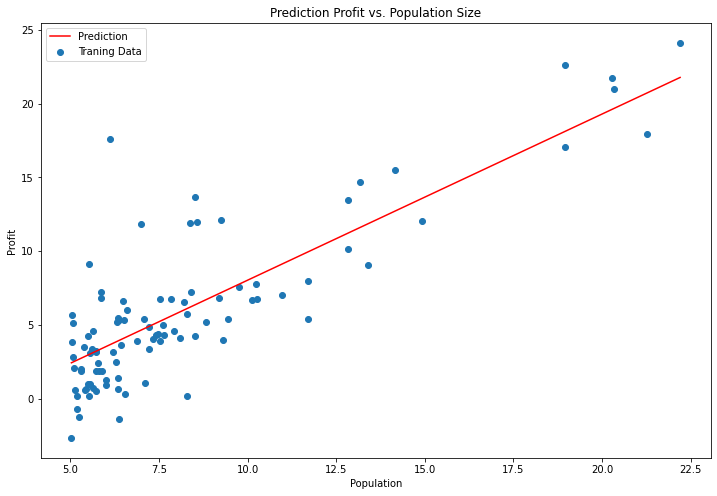

In [18]:
x = np.linspace(data.Population.min(),data.Population.max(),100)
f = g[0,0]+(g[0,1]*x)
fig,ax=plt.subplots(figsize = (12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.Population,data.Profit,label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Prediction Profit vs. Population Size')
plt.show()

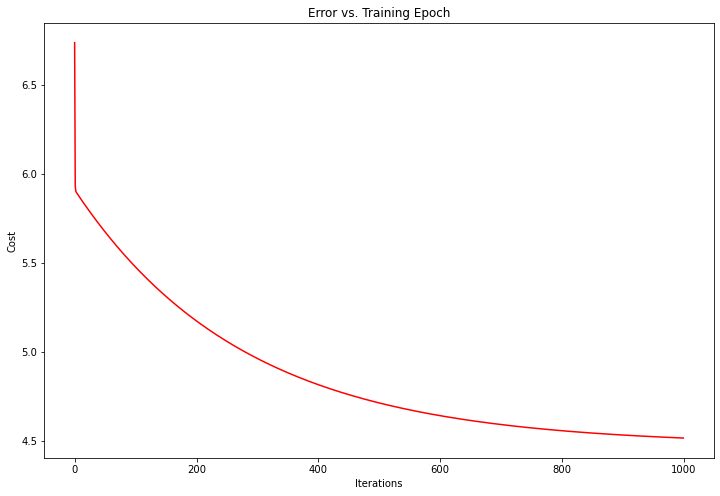

In [19]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

# 多元线性回归

In [20]:
path = 'ex1data2.txt'
data2 = pd.read_csv(path,header = None,names = ['Size','Bedrooms','Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [21]:
# scale the data
data2 = (data2-data2.mean())/data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [24]:
# add ones column
data2.insert(0,'Ones',1)

cols = data2.shape[1]
X2 = data2.iloc[:,:-1]
y2 = data2.iloc[:,-1]

X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values).T
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2,cost2 = gradientDescent(X2,y2,theta2,alpha,iters)

# get the cost of the model
computeCost(X2,y2,g2)


0.13070336960771892

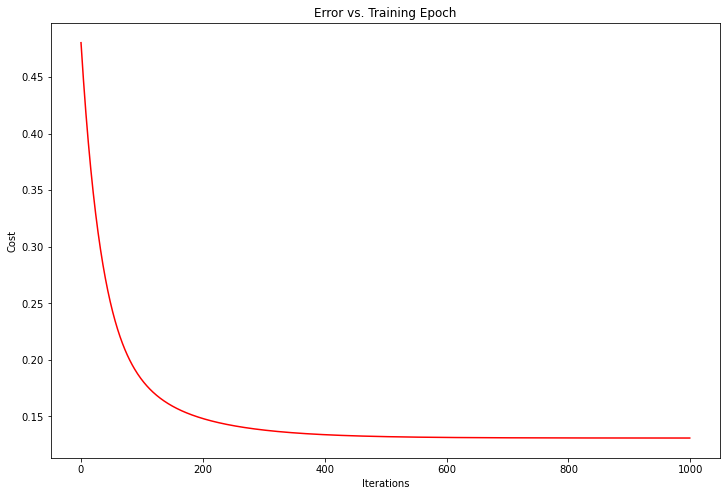

In [26]:
fig ,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost2,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## use scikit-learn function

In [27]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

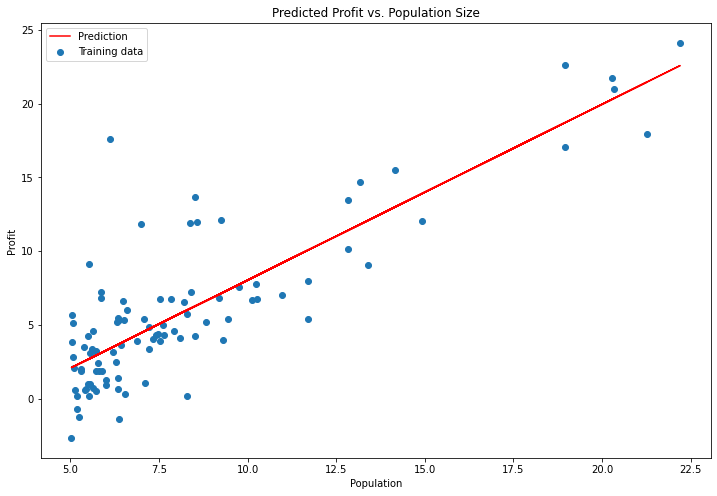

In [36]:
x = np.array(X[:,1].A1)
f = model.predict(X).flatten()

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x, f,'r',label = 'Prediction')
ax.scatter(data.Population,data.Profit,label='Training data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

## normal equation

In [48]:
def normalEqn(X,y):
    theta = np.linalg.inv(X.T@X)@X.T@y #@ equal to A.dot(B)
    return theta

In [49]:
final_theta2 = normalEqn(X,y)
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])